启动资金: 1000000.00
init
start...
买入价格：2.36
卖出价格：2.28
买入价格：2.33
卖出价格：2.28
买入价格：2.3
卖出价格：2.61
买入价格：2.64
卖出价格：2.55
买入价格：2.62
卖出价格：2.57
买入价格：2.54
卖出价格：2.49
买入价格：2.56
卖出价格：2.49
买入价格：2.41
卖出价格：2.42
买入价格：2.47
卖出价格：2.45
买入价格：2.49
卖出价格：2.42
买入价格：2.23
卖出价格：2.17
买入价格：2.17
卖出价格：2.14
买入价格：2.18
卖出价格：2.13
买入价格：2.17
卖出价格：2.43
买入价格：2.49
卖出价格：3.34
买入价格：3.42
卖出价格：3.47
买入价格：3.53
卖出价格：4.6
买入价格：3.6
卖出价格：3.54
买入价格：3.17
卖出价格：3.06
买入价格：3.16
卖出价格：3.07
买入价格：3.14
卖出价格：3.32
买入价格：3.35
卖出价格：3.29
买入价格：3.36
卖出价格：3.43
买入价格：3.44
卖出价格：3.44
买入价格：3.46
卖出价格：3.42
买入价格：3.49
卖出价格：4.02
买入价格：4.13
卖出价格：4.03
买入价格：4.12
卖出价格：4.08
买入价格：4.14
卖出价格：4.04
买入价格：3.92
卖出价格：3.89
买入价格：3.92
卖出价格：3.85
买入价格：3.84
卖出价格：3.84
买入价格：3.48
卖出价格：3.35
买入价格：3.32
卖出价格：3.3
买入价格：3.31
卖出价格：3.28
买入价格：3.32
卖出价格：3.24
买入价格：3.23
卖出价格：3.22
买入价格：3.18
卖出价格：3.67
买入价格：3.84
卖出价格：3.73
买入价格：3.86
卖出价格：3.96
买入价格：4.01
卖出价格：3.95
买入价格：3.95
卖出价格：3.96
买入价格：3.98
卖出价格：3.66
买入价格：4.06
卖出价格：3.93
买入价格：4.07
卖出价格：4.08
买入价格：3.91
卖出价格：4.76
买入价格：4.76
卖出价格：4.7
买入价格：4.89
卖出价格：4.75
买入价格：4.8
卖出价格：

<IPython.core.display.Javascript object>


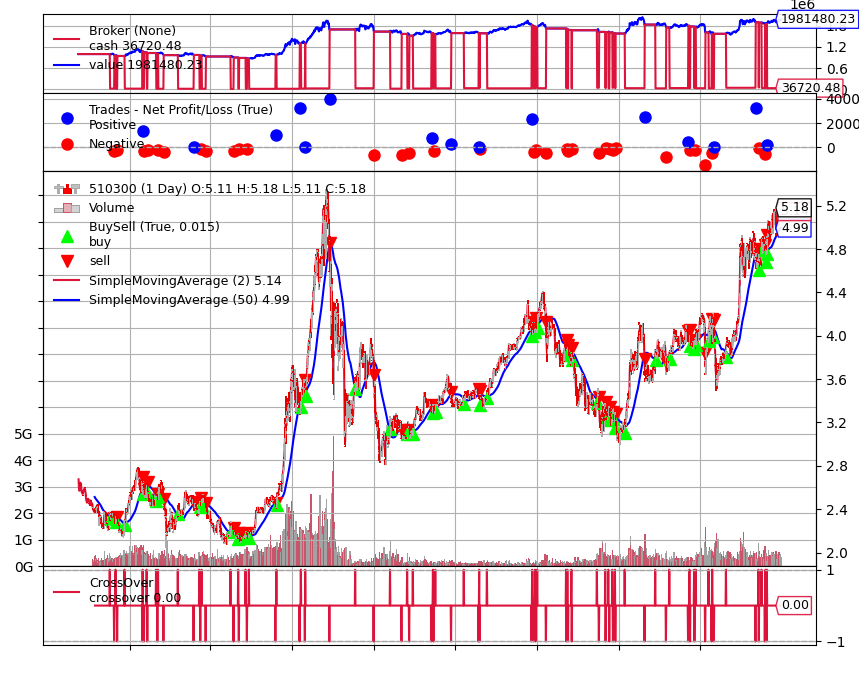

In [9]:
# Python实用宝典
# 2020/05/05
# 转载请注明出处
import datetime
import os.path
import sys
import backtrader as bt
from backtrader.indicators import EMA

# Create a Stratey

class TestStrategy(bt.Strategy):


    
    def __init__(self):
        print("init")

        # 初始化相关数据
        self.dataclose = self.datas[0].close
        
        # 七日移动平均线
        self.sma7 = bt.indicators.SimpleMovingAverage(self.datas[0], period=2)
        #self.sma7 = bt.indicators.SimpleMovingAverage(self.data.close, period=7)
        # 二十一日移动平均线
        self.sma21 = bt.indicators.SimpleMovingAverage(self.datas[0], period=50)
        #self.sma21 = bt.indicators.SimpleMovingAverage(self.data.close, period=21)
        self.buy_signal = bt.indicators.CrossOver(self.sma7,self.sma21)
        
       

    
    def start(self):
        print("start...")
     

    def next(self):
        #print("next")
        #print(self.dataclose[0])
        #正式交易

        # 是否正在下单，如果是的话不能提交第二次订单

        if not self.position and self.buy_signal[0] == 1:
            self.oder = self.buy()
            print("买入价格：" + str(self.dataclose[0]))
    
#         if not self.position and self.buy_signal[0] == -1:
#             self.order = self.sell()
#             print("卖出价格：" + str(self.dataclose[0]))

#         if self.position and self.buy_signal[0] == 1:
#             self.order = self.close()
#             self.order = self.buy()
#             print("买入价格：" + str(self.dataclose[0]))
            
        if self.position and self.buy_signal[0] == -1:
            #self.order = self.close()
            self.order = self.sell()    
            print("卖出价格：" + str(self.dataclose[0]))
            
if __name__ == '__main__':

    # 初始化模型
    cerebro = bt.Cerebro()

    # 构建策略
    strats = cerebro.addstrategy(TestStrategy)
    # 每次买100股
    #cerebro.addsizer(bt.sizers.FixedSize, stake=1000)
    #cerebro.addsizer(percent)
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, "/root/002859.csv")

    # 加载数据到模型中
    data = bt.feeds.YahooFinanceData(dataname='510300.SS',
                                    fromdate=datetime.datetime(2010, 1, 1),
                                    todate=datetime.datetime(2020, 12, 31),)
                                    
    cerebro.adddata(data)
    #data2 = cerebro.resampledata(data,timeframe= bt.TimeFrame.Weeks,compression=1)
    #cerebro.adddata(data2)
    # 设定初始资金和佣金
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(0.0002)
    cerebro.addsizer(bt.sizers.PercentSizer, percents=98)

    # 策略执行前的资金
    print('启动资金: %.2f' % cerebro.broker.getvalue())

    # 策略执行
    cerebro.run()
    print('结束资金: %.2f' % cerebro.broker.getvalue())

    cerebro.plot(style = "candlestick")  # 绘图
